In [22]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob
import scipy
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_dir="./dataset"
org_dir ="D:\Asus\AI_ML\dataset_imageclassification\dataset_imageclassification\train_data\train_data"

CLASS = ['Gasoline can','Hammer','Pliers','Rope','Screw Driver','Tool Box','Wrench','pebbel', 'random']

In [24]:
for c in CLASS:
  DEST = os.path.join(train_dir,c)
  if not os.path.exists(DEST):
    os.makedirs(DEST)

In [25]:
os.listdir("dataset_imageclassification/dataset_imageclassification/train_data/train_data")

['Gasoline Can',
 'Hammer',
 'pebbel',
 'Pliers',
 'random',
 'Rope',
 'Screw Driver',
 'Tool box',
 'Wrench']

In [7]:
CLASS.indices

AttributeError: 'list' object has no attribute 'indices'

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import keras

base_model = InceptionV3(input_shape=(256,256,3),include_top=False)

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=9 , activation="sigmoid")(x)

#final model
model = Model(base_model.input,x)

#compile the model
model.compile(optimizer= "adam",loss = keras.losses.binary_crossentropy,metrics=["accuracy"])

#summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 127, 127, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 127, 127, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 127, 127, 32)         0         ['batch_normalization_94

Found 18738 images belonging to 9 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


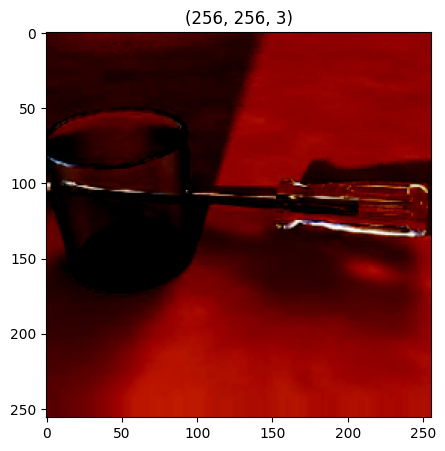

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


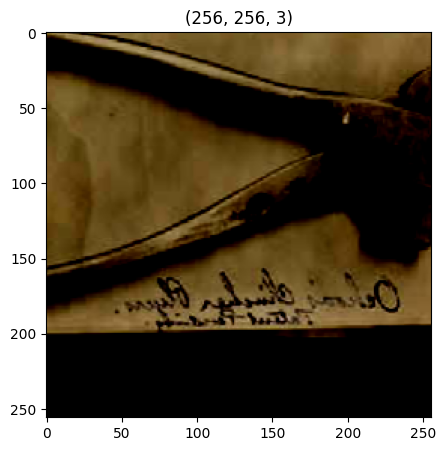

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


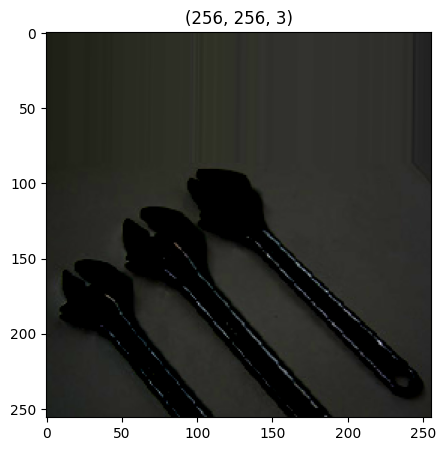

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


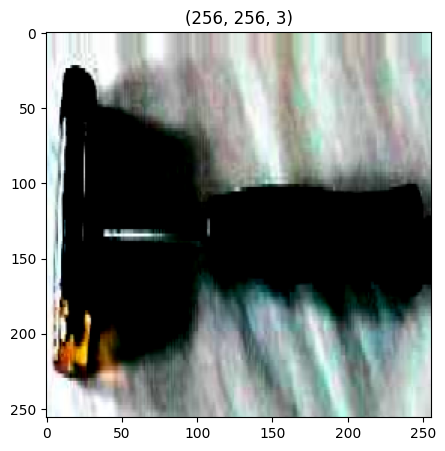

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


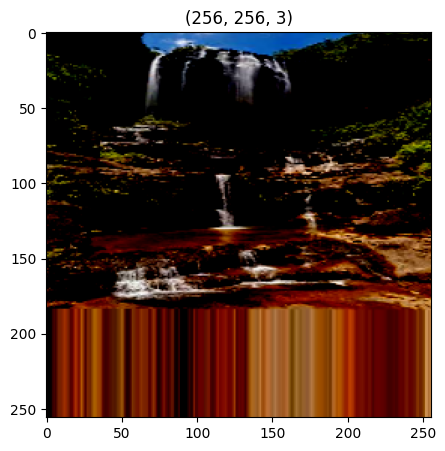

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


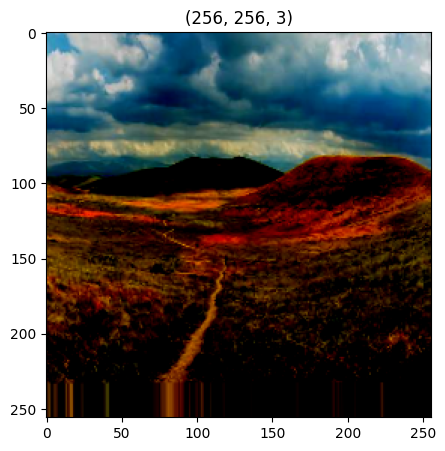

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


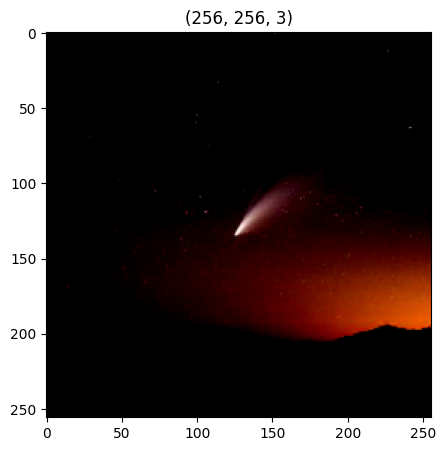

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


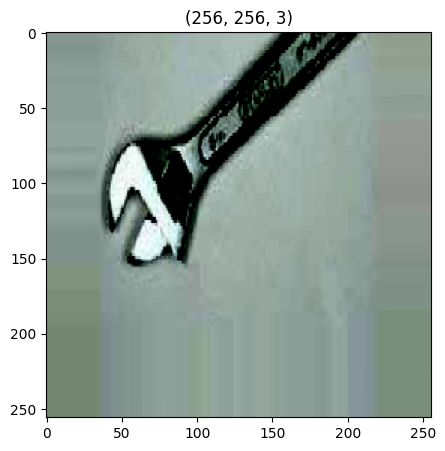

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


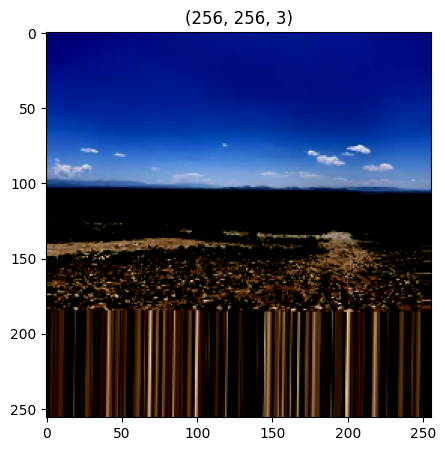

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


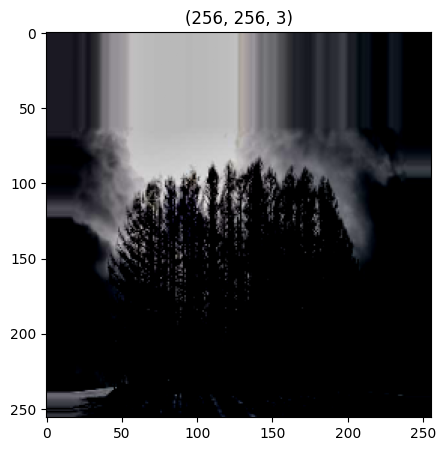

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


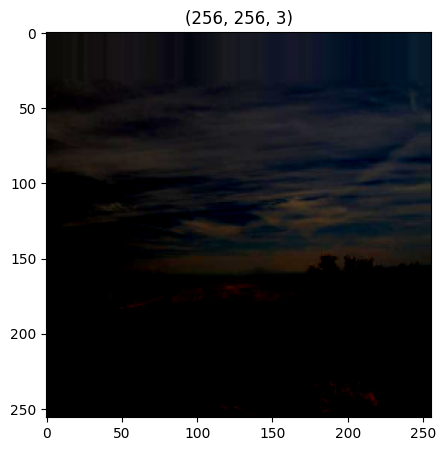

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


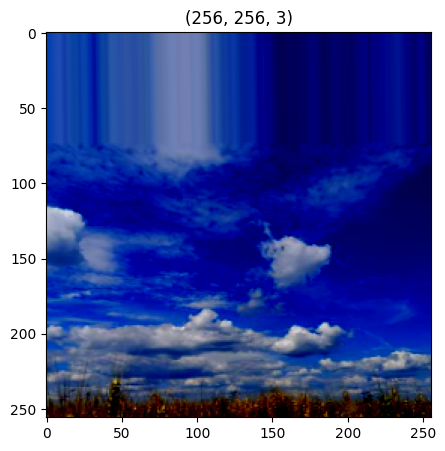

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


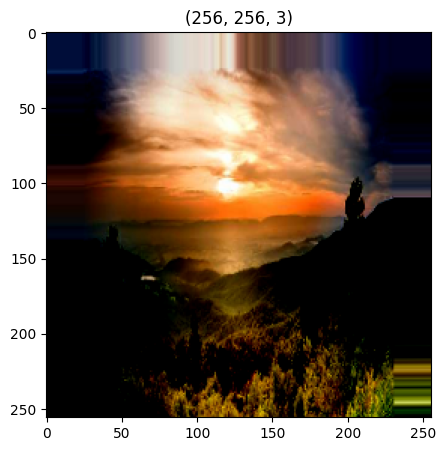

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


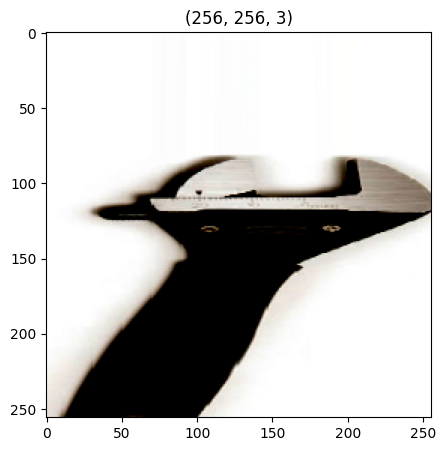

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


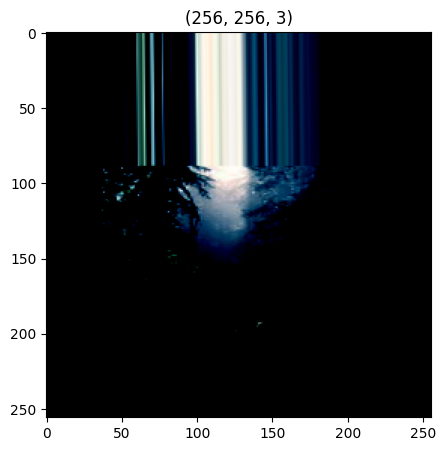

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


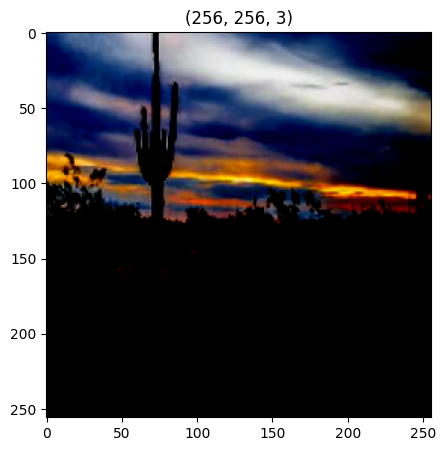

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


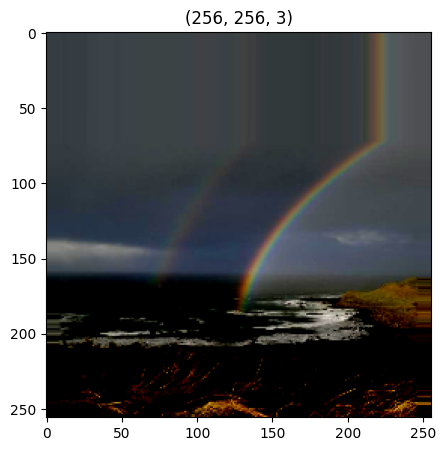

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


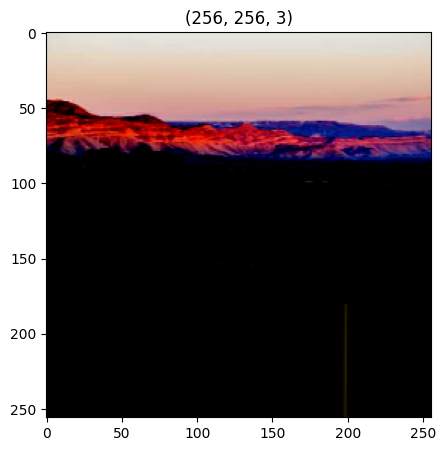

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


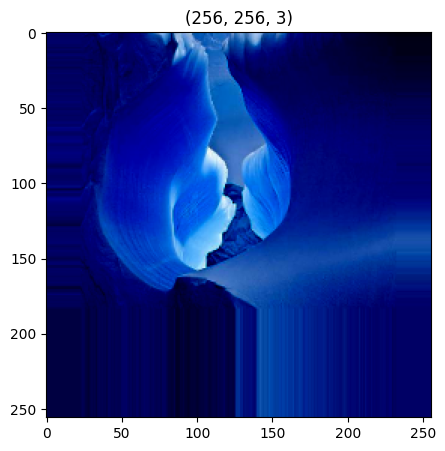

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


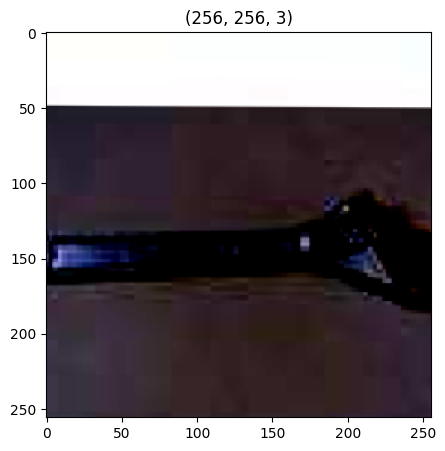

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


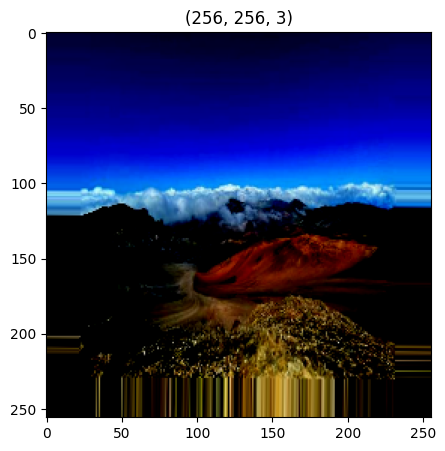

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


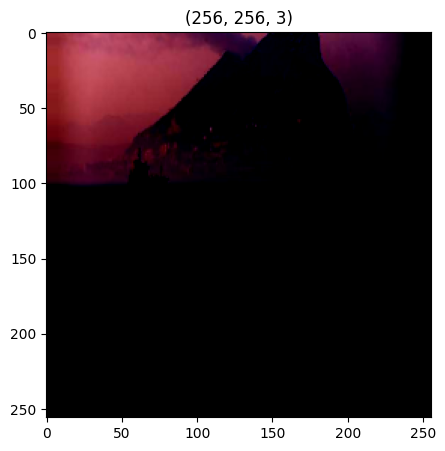

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


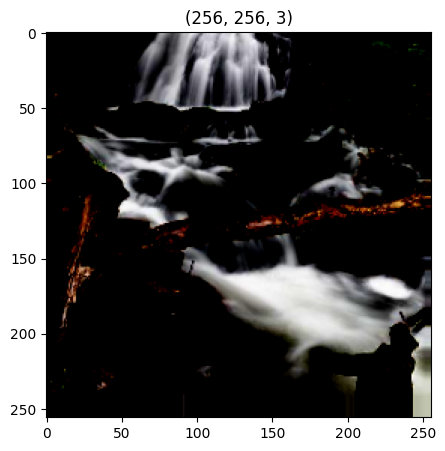

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


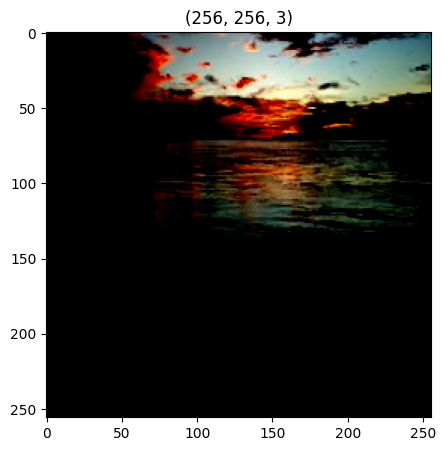

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


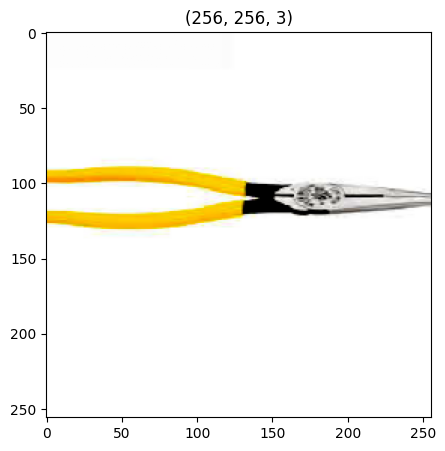

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


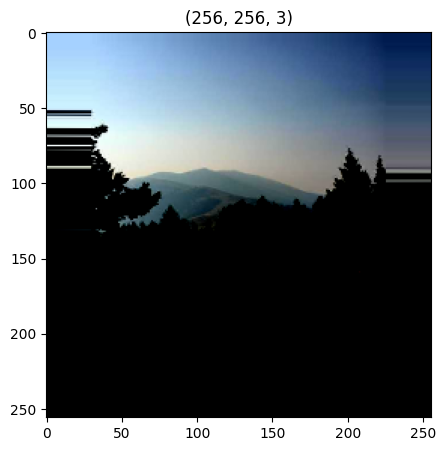

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


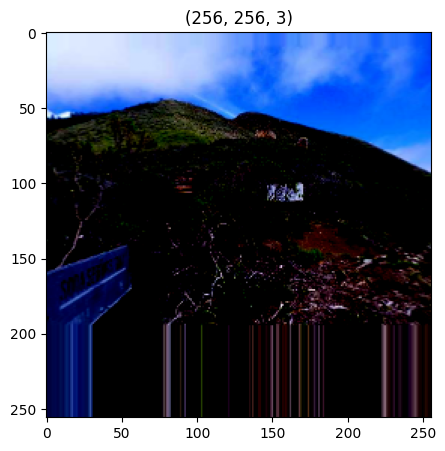

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


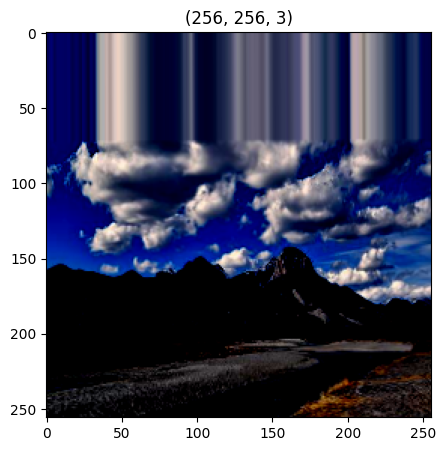

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


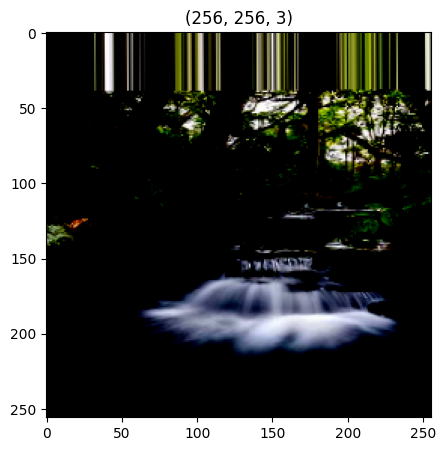

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


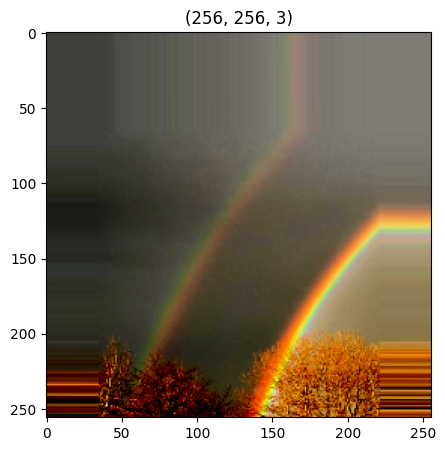

In [27]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range=0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4
                                   )

train_data=train_datagen.flow_from_directory(directory="dataset_imageclassification/dataset_imageclassification/train_data/train_data",target_size=(256,256),batch_size = 64)

train_data.class_indices

t_img,label =train_data.next()

t_img.shape

def plotImages(img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx<30:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.interactive(False)
      plt.show(block=True)
      plt.show()


plotImages(t_img,label)

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="./model.h5",
                     monitor="accuracy",
                     verbose=2,
                     save_best_only=True)

es = EarlyStopping(monitor="accuracy", min_delta=0.01,patience=5,verbose=2)

cb=[mc,es]

In [29]:
his = model.fit_generator(train_data,steps_per_epoch=10,epochs=30,callbacks=cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.7316 - accuracy: 0.6531
Epoch 1: accuracy improved from -inf to 0.65312, saving model to .\model.h5
10/10 [==============================] - 48s 4s/step - loss: 1.7316 - accuracy: 0.6531
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.6597 - accuracy: 0.7500
Epoch 2: accuracy improved from 0.65312 to 0.75000, saving model to .\model.h5
10/10 [==============================] - 39s 4s/step - loss: 1.6597 - accuracy: 0.7500
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.8203
Epoch 3: accuracy improved from 0.75000 to 0.82031, saving model to .\model.h5
10/10 [==============================] - 49s 5s/step - loss: 0.6749 - accuracy: 0.8203
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8484
Epoch 4: accuracy improved from 0.82031 to 0.84844, saving model to .\model.h5
10/10 [==============================] - 50s 5s/st

In [30]:
from keras.models import load_model
model = load_model("./model.h5")

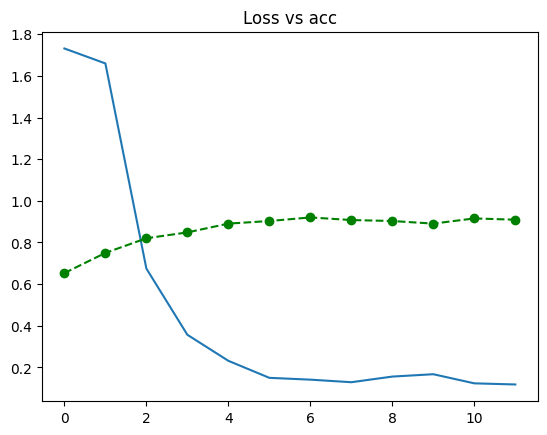

In [31]:
h= his.history
h.keys()
plt.interactive(False)
plt.plot(h['loss'])
plt.plot(h['accuracy'] ,"go--", c="green")
plt.title("Loss vs acc")
plt.show(block = True)

In [32]:
def prediction(path,model):

    # path = "dataset_imageclassification/dataset_imageclassification/train_data/train_data/random/1v3vhq.jpg"
    img = load_img(path, target_size = (256,256))

    i = img_to_array(img)
    i = preprocess_input(i)



    input_arr = np.array([i])
    input_arr.shape

    pred = np.argmax(model.predict(input_arr))

    if pred == 0:
        print("This is a Gasoline Can")

    elif (pred == 1):
        print("This is a hammer")

    elif (pred == 2):
        print("This is a Plier ")

    elif pred == 3:
        print("This is a rope")

    elif pred == 4:
        print("This is a screw driver")

    elif pred == 5:
        print("This is a tool box")

    elif pred == 6:
        print("This is a wrench")

    elif pred == 7:
        print("This is a pebbel")

    else:
        print("No this is not a machine part")

    plt.imshow(input_arr[0])
    plt.title("input image")
    plt.axis = False
    plt.interactive(False)
    plt.show(block = True)

1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


This is a hammer


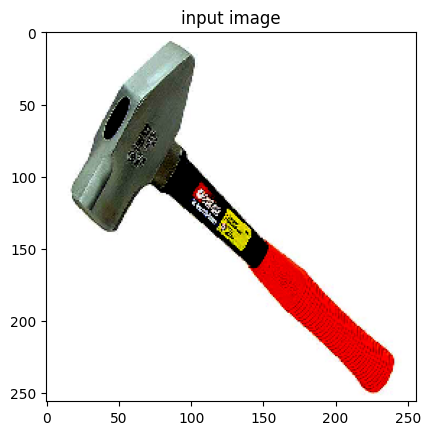

In [33]:
prediction("dataset_imageclassification/dataset_imageclassification/test_data/test_data/Hammer (1888).JPEG",model)

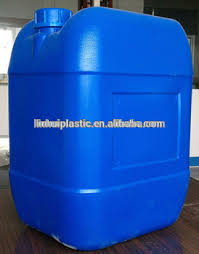

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block8_sepconv1_act"

path = "dataset_imageclassification/dataset_imageclassification/test_data/test_data/Gasoline can (227).jpg"

display(Image(path))

1/1 [==============================] - 2s 2s/step
Predicted: [('n02795169', 'barrel', 7.1462994)]


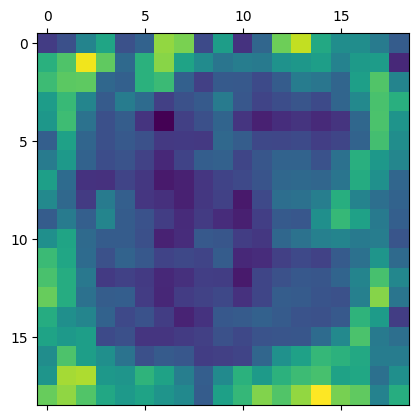




image with heatmap representing region on interest

The original input image



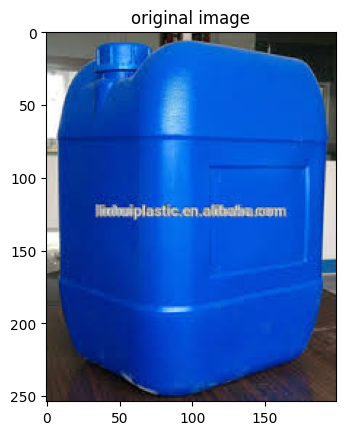

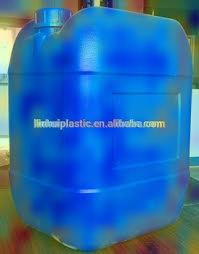

In [21]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Prepare image
img_array = preprocess_input(get_img_array(path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.interactive(False)
plt.show(block = True)




print()
print()
print()
print("image with heatmap representing region on interest")
#  save_and_display_gradcam(path,heatmap)

print()
print("The original input image")
print()
#to display image
a= plt.imread(path)
plt.imshow(a,cmap="gray")
plt.title("original image")
  # plt.axis = False
plt.show()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(path, heatmap)